In [17]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


# Part I

In [317]:
font = {'size':12, 'family':'serif'}
plt.matplotlib.rc('font', **font)

In [184]:
with open("data/usca312_dist.txt") as f:
    D = numpy.array(f.read().split(), dtype=float).reshape(312, 312)

In [332]:
def MDS(D, N):
    """
    Implementing the MDS method
    
    D: distances matrix
    N: Number of points in the data
    """
    Cm = np.identity(N)  - 1./N
    B = -0.5*dot(Cm.T, dot(D**2, Cm))
    eigvals, eigvec = linalg.eig(B)
    E = eigvec[:,:2].real
    L = np.zeros([2,2])
    L[0][0] = eigvals[0].real
    L[1][1] = eigvals[1].real
    X = dot(E, np.sqrt(np.abs(L)))
    return X

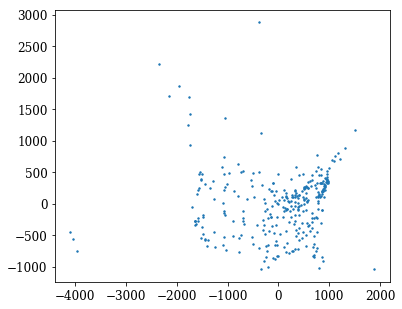

In [441]:
figure(figsize=(6,5))
scatter(X[:,0], -X[:,1], s=2)
#xlabel('$$')

savefig('usa_map.pdf', bbox_inches='tight')

# Part II

## 1.

In [329]:
with open("data/training.txt") as f:
    SM = numpy.array(f.read().split(), dtype=float).reshape(250, 250)

In [331]:
colors=np.loadtxt('data/training_ys.txt')

In [356]:
index_c1 = where(colors==10)
index_c2 = where(colors==5)

In [334]:
x2 = MDS(SM, 250)

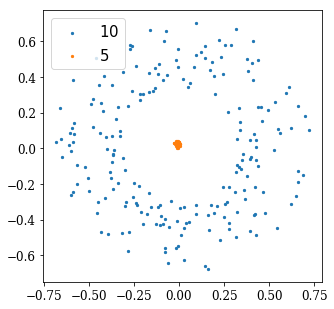

In [452]:
figure(figsize=(5,5))

scatter(x2[index_c1,0], -x2[index_c1,1], s=5, label='$10$')
scatter(x2[index_c2,0], -x2[index_c2,1], s=5, label='$5$')
legend(fontsize=15, ncol=1)
savefig('rings.pdf', bbox_inches='tight')

## 2.

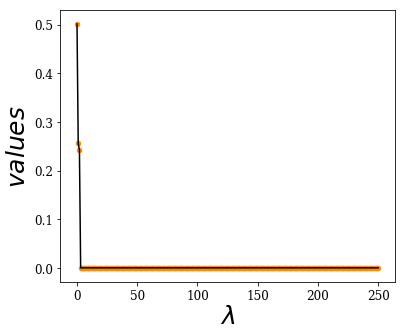

In [479]:
eigvals, eigvec = linalg.eig(SM**2)

figure(figsize=(6,5))
plot(linspace(0, len(eigvals.real),len(eigvals.real)), eigvals.real/sum(eigvals.real), c='k')
scatter(linspace(0, len(eigvals.real),len(eigvals.real)), eigvals.real/sum(eigvals.real), 
        s=20, c='darkorange')
plt.ylabel('$values$', fontsize=25)
plt.xlabel('$\lambda$', fontsize=25)

savefig('M_eigval.pdf', bbox_inches='tight')

In [483]:
sum(eigvals[:3].real/sum(eigvals.real))

1.0



## 3.

In [364]:
import scipy.sparse.linalg as ssl

In [586]:
with open("data/testing.txt") as f:
    M_test = numpy.array(f.read().split(), dtype=float).reshape(250, 50)
    
truth = np.loadtxt("data/testing_ys.txt")

In [637]:
lagrange = 0.0001
#inv_m = np.linalg.inv(dot(M_test, M_test.T) + np.identity(50) * lagrange)

In [638]:
def kernel(M, y, test):
    #inv_m = np.linalg.inv(dot(M, M.T) + np.identity(50) * lagrange)   
    inv_m = np.linalg.inv(M + np.identity(250) * lagrange)   
    A = dot(inv_m, y)
    print(shape(A))
    y_pred = dot(test, A)
    return y_pred

In [639]:
y_1 = kernel(SM, colors, M_test.T)

(250,)


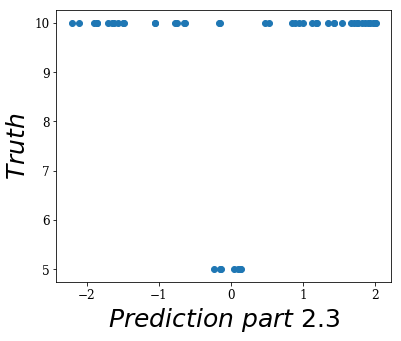

In [655]:
figure(figsize=(6,5))
scatter(y_1, truth)
xlabel('$Prediction\ part\ 2.3$', fontsize=25)
ylabel('$Truth$', fontsize=25)

## 4.


In [647]:
y_2 = kernel(SM+1, colors, M_test.T+1)

(250,)


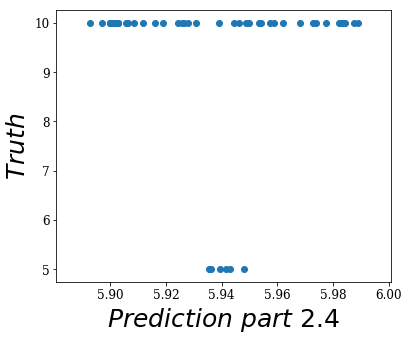

In [656]:
figure(figsize=(6,5))
scatter(y_2, truth)

xlabel('$Prediction\ part\ 2.4$', fontsize=25)
ylabel('$Truth$', fontsize=25)

## 5.

In [651]:
y_3 = kernel((SM+1)**2, colors, (M_test.T+1)**2)

(250,)


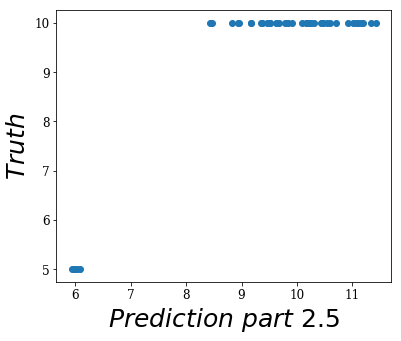

In [657]:
figure(figsize=(6,5))
scatter(y_3, truth)
xlabel('$Prediction\ part\ 2.5$', fontsize=25)
ylabel('$Truth$', fontsize=25)